[*********************100%***********************]  2 of 2 completed

Index(['^DJI', '^KS11'], dtype='object', name='Ticker')
['Date']
(211, 2)
<class 'pandas.core.frame.DataFrame'>
Ticker            ^DJI       ^KS11
Date                              
2025-11-20  107.925955  166.942491
2025-11-21  109.089253  160.623446
2025-11-24  109.567782  160.323316
2025-11-25  111.134529  160.811864
2025-11-26  111.876815  165.109182


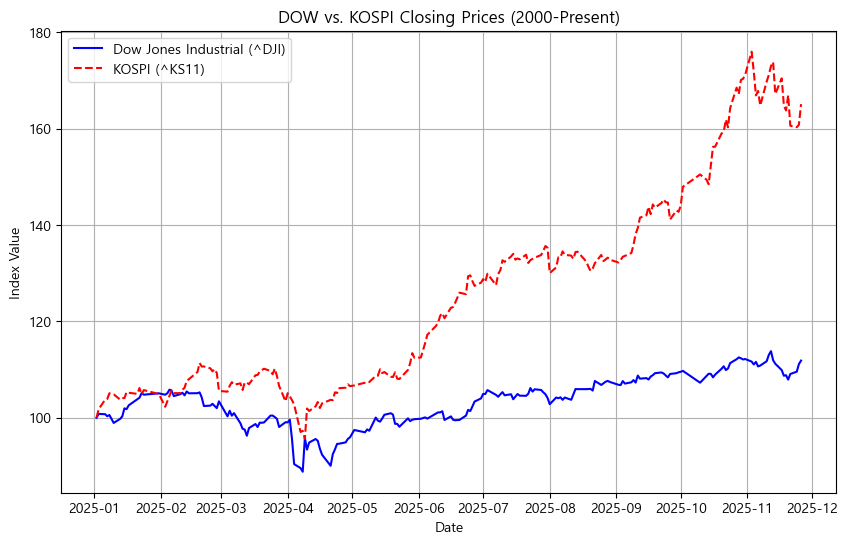

In [7]:
# Dow vs Kospi
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 

ticker = ['^DJI','^KS11']
start_date = '2025-01-02'
data = yf.download(ticker, start=start_date, auto_adjust=True) # data 변수에 KOSPI 데이터 저장

close_data = data['Close'] #close level은 없어진다.
df = close_data.dropna()
normalized_df = (df / df.iloc[0]) * 100

print(normalized_df.columns)
print(normalized_df.index.names)
print(normalized_df.shape) #[0] row(). [1] columns
print(type(normalized_df))
print(normalized_df.tail())

plt.figure(figsize=(10, 6))
plt.plot(normalized_df.index, normalized_df['^DJI'], label='Dow Jones Industrial (^DJI)', color='blue' )
plt.plot(normalized_df.index, normalized_df['^KS11'], label='KOSPI (^KS11)', color='red', linestyle='--' )
plt.title('DOW vs. KOSPI Closing Prices (2000-Present)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


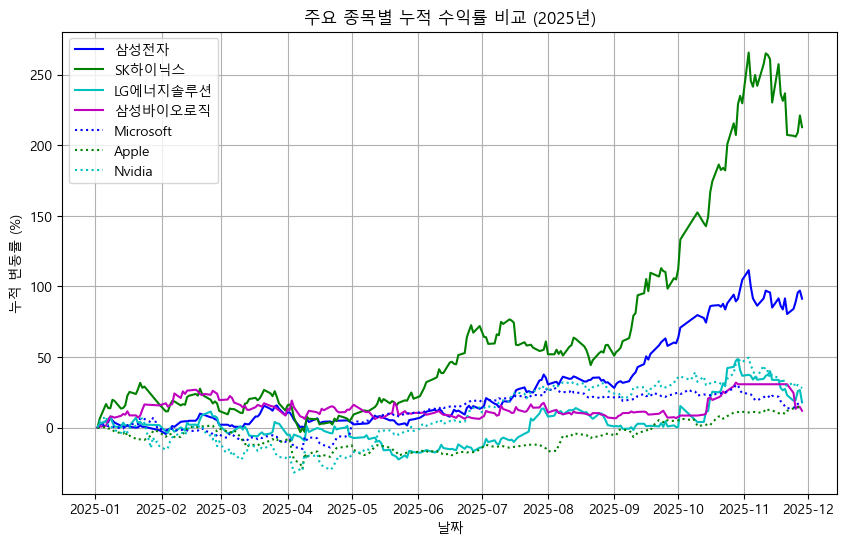

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def calculate_cumulative_return(df):
    # 일간 변동률 계산: (현재 종가 - 이전 종가) / 이전 종가 * 100
    # 누적 수익률 계산: (100 + 일간 변동률)의 누적곱 * 100 - 100
    dpc = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1) * 100
    dpc.iloc[0] = 0 
    dpc_cp = ((100 + dpc) / 100).cumprod() * 100 - 100
    return dpc_cp

tickers = [
    {'code': '005930.KS', 'label': '삼성전자', 'style': 'b-'},
    {'code': '000660.KS', 'label': 'SK하이닉스', 'style': 'g-'},
    {'code': '373220.KS', 'label': 'LG에너지솔루션', 'style': 'c-'},
    {'code': '207940.KS', 'label': '삼성바이오로직', 'style': 'm-'},
    #{'code': '005380.KS', 'label': '현대차', 'style': 'r-'},
    #{'code': '034020.KS', 'label': '두산에너빌리티', 'style': 'y-'},
    #{'code': '329180.KS', 'label': 'HD현대중공업', 'style': 'k-'},    
    #{'code': '105560.KS', 'label': 'KB금융', 'style': 'b--'},    
    #{'code': '000270.KS', 'label': '기아', 'style': 'g--'},        
    #{'code': '012450.KS', 'label': '한화에어로스페이스', 'style': 'c--'},        
    #{'code': '068270.KS', 'label': '셀트리온', 'style': 'm--'},        
    #{'code': '402340.KS', 'label': 'SK스퀘어', 'style': 'r--'},        
    #{'code': '035420.KS', 'label': 'NAVER', 'style': 'y--'},        
    {'code': 'MSFT', 'label': 'Microsoft', 'style': 'b:'},
    {'code': 'AAPL', 'label': 'Apple', 'style': 'g:'},
    {'code': 'NVDA', 'label': 'Nvidia', 'style': 'c:'},
]
#한국거래소: https://data.krx.co.kr, 각종 지수 제공, 시총10
cumulative_returns = {}
start_date = '2025-01-02'

for ticker_info in tickers:
    code = ticker_info['code']

    try:
        df = yf.download(code, start=start_date, auto_adjust=True)
    except Exception as e:
        print(f"Error downloading data for {code}: {e}")
        continue
        
    if not df.empty:
        dpc_cp = calculate_cumulative_return(df)
        cumulative_returns[code] = {
            'data': dpc_cp,
            'style': ticker_info['style'],
            'label': ticker_info['label'],
            'index': df.index # 날짜 인덱스도 함께 저장
        }

plt.figure(figsize=(10, 6))
for code, data in cumulative_returns.items():
    plt.plot(data['index'], data['data'], data['style'], label=data['label'])
plt.title('주요 종목별 누적 수익률 비교 (2025년)')
plt.ylabel('누적 변동률 (%)')
plt.xlabel('날짜')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

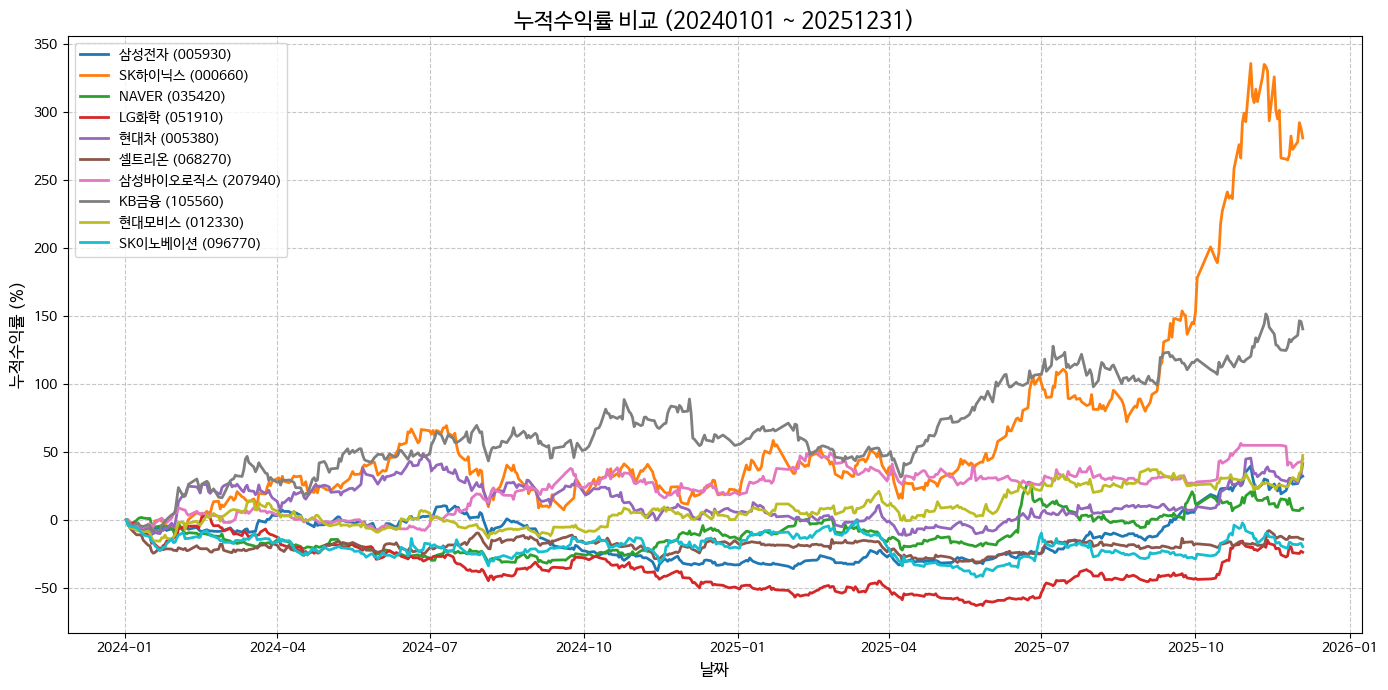

In [1]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

start_date = "20240101"
end_date = "20251231"

# 원하는 만큼 티커를 넣으세요.
tickers = ["005930", "000660", "035420", "051910", "005380", "068270", "207940", "105560", "012330", "096770"]
#tickers = ["005930", "000660", "035420", "051910", "005380"]

plt.figure(figsize=(14, 7))

for ticker in tickers:
    name = stock.get_market_ticker_name(ticker)
    df = stock.get_market_ohlcv(start_date, end_date, ticker)
    dpc = (df['종가'] - df['종가'].shift(1)) / df['종가'].shift(1) * 100 #dpc: daily percent change
    dpc.iloc[0] = 0
    cp = ((100 + dpc) / 100).cumprod() * 100 - 100 # 일간 변동률 누적곱 계산
    plt.plot(cp, linewidth=2, label=f"{name} ({ticker})")

plt.title(f"누적수익률 비교 ({start_date} ~ {end_date})", fontsize=16)
plt.xlabel("날짜", fontsize=12)
plt.ylabel("누적수익률 (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

In [58]:
#Dual Momentum
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

import sys
import os

investar_parent_path = 'C:\\myPackage'
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)

from Investar.Analyzer import MarketDB
from Investar.DualMomentum import DualMomentum

mk = MarketDB()
dm = DualMomentum()
rm = dm.get_rltv_momentum('2025-02-26','2025-06-26',30)
am = dm.get_abs_momentum(rm,'2025-06-26','2025-11-26')


      code  company  old_price  new_price      returns
0   012170     아센디오        230       3190  1286.956522
1   036630    세종텔레콤        424       5020  1083.962264
2   258050    테크트랜스        266       2200   727.067669
3   405000     플라즈맵       1040       8590   725.961538
4   352770    셀레스트라        695       5250   655.395683
5   214610     롤링스톤        805       5450   577.018634
6   042510    라온시큐어       2140      12030   462.149533
7   065060      지엔코        252       1310   419.841270
8   222810     세토피아       1080       5400   400.000000
9   307280    원바이오젠       1138       5410   375.395431
10  131090      시큐브        904       4280   373.451327
11  009310   참엔지니어링        351       1423   305.413105
12  208710       포톤        630       2550   304.761905
13  124500  아이티센글로벌       6190      24400   294.184168
14  060240    스타코링크        535       1976   269.345794
15  088800    에이스테크        759       2750   262.318841
16  377030     비트맥스       2140       7120   232.710280
17  419530

end_date is initialized to '2025-11-30'
              code        date    open    high     low   close   diff   volume
date                                                                          
2024-01-02  000660  2024-01-02  139700  142800  139700  142400    900  2147458
2024-01-03  000660  2024-01-03  140000  140800  136800  136800   5600  3257820
2024-01-04  000660  2024-01-04  136800  138800  135800  136400    400  2661970
2024-01-05  000660  2024-01-05  135800  137500  135800  137500   1100  1846781
2024-01-08  000660  2024-01-08  137500  137900  135400  136000   1500  2498302
...            ...         ...     ...     ...     ...     ...    ...      ...
2025-11-24  000660  2025-11-24  531000  542000  517000  520000   1000  6399162
2025-11-25  000660  2025-11-25  546000  550000  518000  519000   1000  3716730
2025-11-26  000660  2025-11-26  513000  528000  501000  524000   5000  5127393
2025-11-27  000660  2025-11-27  535000  556000  533000  544000  20000  3654092
2025-11-28  

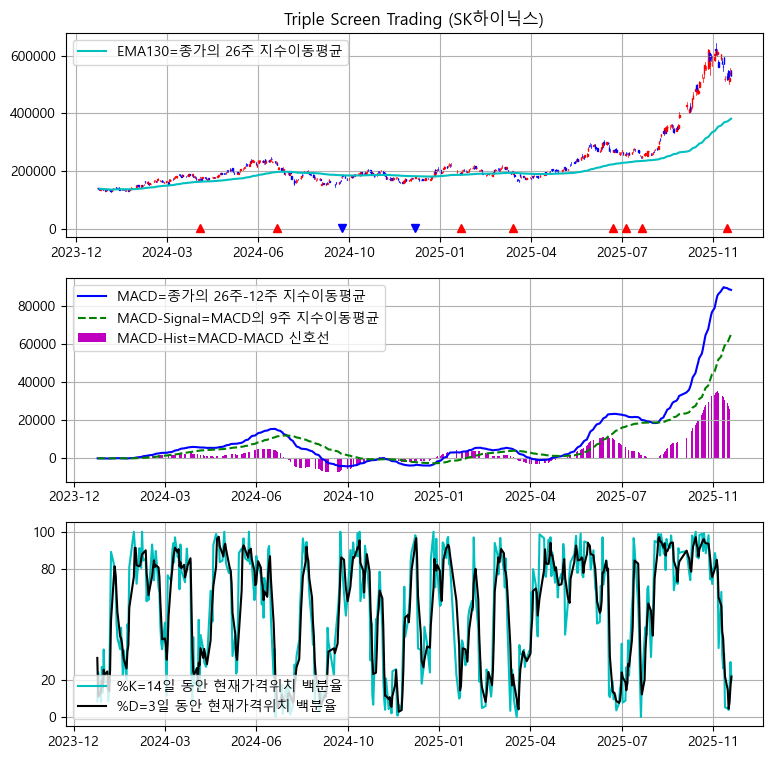

In [2]:
#Triple Action
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc 
import matplotlib.font_manager as fm

# 폰트 및 설정 (이전에 한글 문제 해결을 위해 추가된 부분)
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False
import sys
import os

investar_parent_path = 'C:\\myPackage'
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
from Investar.Analyzer import MarketDB
mk = MarketDB()

# Triple Screen, Bollinger Band - trend following, reversals
company = 'SK하이닉스'
start_date = "2024-01-02"
df = mk.get_daily_price(company, start_date)
print(df)

ema60 = df.close.ewm(span=60).mean()
ema130 = df.close.ewm(span=130).mean() 
macd = ema60 - ema130
signal = macd.ewm(span=45).mean() 
macdhist = macd - signal

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal, macdhist=macdhist).dropna()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]

ndays_high = df.high.rolling(window=14, min_periods=1).max()
ndays_low = df.low.rolling(window=14, min_periods=1).min()
fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()

plt.figure(figsize=(9, 9))
p1 = plt.subplot(3, 1, 1)
plt.title(f'Triple Screen Trading ({company})')
#plt.title(f'Triple Screen Trading - First Screen ({company})')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130=종가의 26주 지수이동평균')
for i in range(1, len(df.close)):
    if df.ema130.values[i-1] < df.ema130.values[i] and df.slow_d.values[i-1] >= 20 and df.slow_d.values[i] < 20:
        plt.plot(df.number.values[i], 3000, 'r^') 
    elif df.ema130.values[i-1] > df.ema130.values[i] and df.slow_d.values[i-1] <= 80 and df.slow_d.values[i] > 80:
        plt.plot(df.number.values[i], 3000, 'bv') 
plt.legend(loc='best')

p2 = plt.subplot(3, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist=MACD-MACD 신호선')
plt.plot(df.number, df['macd'], color='b', label='MACD=종가의 26주-12주 지수이동평균')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal=MACD의 9주 지수이동평균')
plt.legend(loc='best')

p3 = plt.subplot(3, 1, 3)
plt.grid(True)
p3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K=14일 동안 현재가격위치 백분율')
plt.plot(df.number, df['slow_d'], color='k', label='%D=3일 동안 현재가격위치 백분율')
plt.yticks([0, 20, 80, 100])
plt.legend(loc='lower left')
#plt.legend(loc='best')
plt.show()


end_date is initialized to '2025-11-30'
              code        date    open    high     low   close   diff   volume
date                                                                          
2024-01-02  000660  2024-01-02  139700  142800  139700  142400    900  2147458
2024-01-03  000660  2024-01-03  140000  140800  136800  136800   5600  3257820
2024-01-04  000660  2024-01-04  136800  138800  135800  136400    400  2661970
2024-01-05  000660  2024-01-05  135800  137500  135800  137500   1100  1846781
2024-01-08  000660  2024-01-08  137500  137900  135400  136000   1500  2498302
...            ...         ...     ...     ...     ...     ...    ...      ...
2025-11-24  000660  2025-11-24  531000  542000  517000  520000   1000  6399162
2025-11-25  000660  2025-11-25  546000  550000  518000  519000   1000  3716730
2025-11-26  000660  2025-11-26  513000  528000  501000  524000   5000  5127393
2025-11-27  000660  2025-11-27  535000  556000  533000  544000  20000  3654092
2025-11-28  

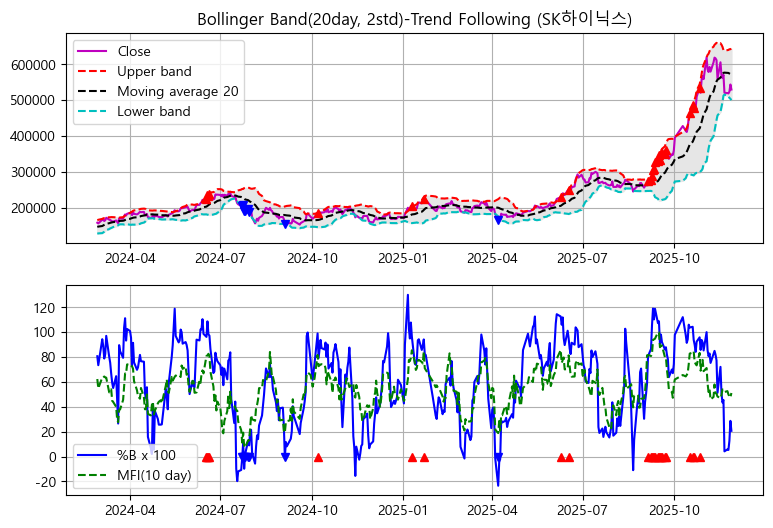

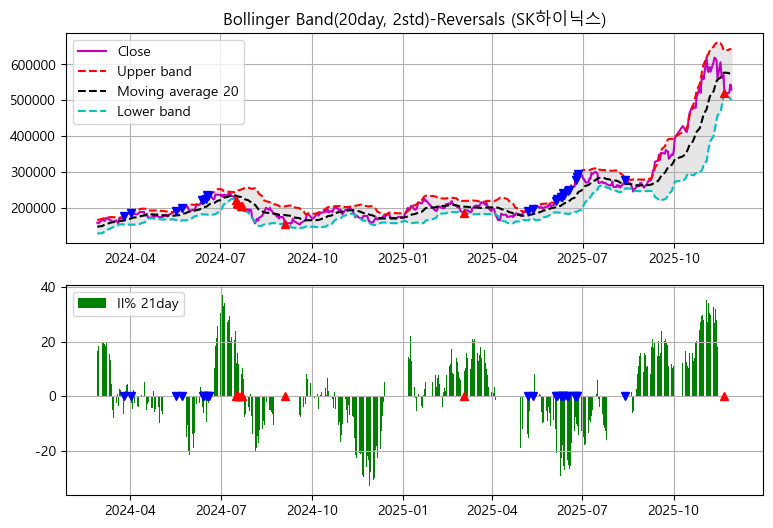

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

investar_parent_path = 'C:\\myPackage' 
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
    
from Investar.Analyzer import MarketDB
mk = MarketDB() 

df = mk.get_daily_price(company, start_date)
print(df)

df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100

df['TP'] = (df['high'] + df['low'] + df['close']) / 3
df['PMF'] = 0
df['NMF'] = 0
for i in range(len(df.close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = (df.PMF.rolling(window=10).sum() /
    df.NMF.rolling(window=10).sum())
df['MFI10'] = 100 - 100 / (1 + df['MFR'])

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100
df = df.dropna()

df = df[19:]

plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)
plt.title(f'Bollinger Band(20day, 2std)-Trend Following ({company})')
plt.plot(df.index, df['close'], color='m', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100')       # ⑤ 
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')     # ⑥
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])                  # ⑦
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)
plt.title(f'Bollinger Band(20day, 2std)-Reversals ({company})')
plt.plot(df.index, df['close'], 'm', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^') # ⑤
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv') # ⑥
plt.grid(True)
plt.legend(loc='best')
plt.show()